Image Classification with Deep Learning

Problem Statement:

You are working for a computer vision startup that aims to develop an image classification system for a new application. The task is to create a deep learning model using TensorFlow with the Keras API to classify images into predefined categories. The dataset consists of images of various objects relevant to the application.

Requirements:

Dataset:

1. You can download any dataset to satisfy the above problemn statement.

2. The dataset is provided, containing labeled images for training and testing.

3. Explore and analyze the dataset to understand the distribution of classes and image characteristics.

Data Preprocessing:

1. Implement preprocessing steps to prepare the data for training, including normalization, resizing, or any other necessary transformations.

2. Split the dataset into training and testing sets.

Neural Network Architecture:

1. Design a Neural Network (ANN) using Keras for image classification.

2. Choose an appropriate architecture with convolutional layers, pooling layers, and dense layers.

3. Justify the architecture choices based on the nature of the problem.

Model Training:

1. Compile the model with an appropriate optimizer, loss function, and evaluation metric.

2. Train the model on the training set for a specified number of epochs.

3. Monitor the training process and use validation data to prevent overfitting.

Model Evaluation:

1. Evaluate the trained model on the test set and report key performance metrics (e.g... accuracy, precision, recall).

2. Use visualizations, such as confusion matrices or ROC curves, to analyze the model's performance.

Fine-Tuning and Optimization:

1. Experiment with hyperparameter tuning or model modifications to improve performance.

2. Discuss any challenges encountered during training and how they were addressed.

Deployment Considerations:

1. Discuss considerations for deploying the trained model in a real-world application.

2. Address any potential issues related to model size, speed, or compatibility.

Documentation and Reporting:

1. Provide clear and concise documentation for the developed model, including code comments and explanations.

2. Prepare a report summarizing the entire process, key decisions, and the model's performance.

Deliverables:

1. Python code implementing the image classification model.

2. A detailed report documenting the process, including challenges faced and solutions

applied.

3. Visualizations supporting the analysis of the model's performance.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("customerweek.csv")
df.sample(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1005,2858-EIMXH,Female,1,Yes,No,53,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),95.85,5016.25,No
1444,5514-YQENT,Male,0,No,Yes,41,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,111.15,4507.15,No
1536,2882-WDTBA,Male,0,Yes,Yes,69,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),75.75,5388.15,No
6658,0818-OCPZO,Male,1,No,No,27,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,81.45,2122.05,Yes
6066,5349-IECLD,Male,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,94.95,178.1,Yes


In [4]:
df.drop('customerID',axis='columns',inplace=True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.shape

(7043, 20)

In [10]:
df.iloc[488].TotalCharges

' '

In [11]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [12]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


C:\Users\SIRISHA\AppData\Local\Temp\ipykernel_28340\62923673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [15]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [16]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


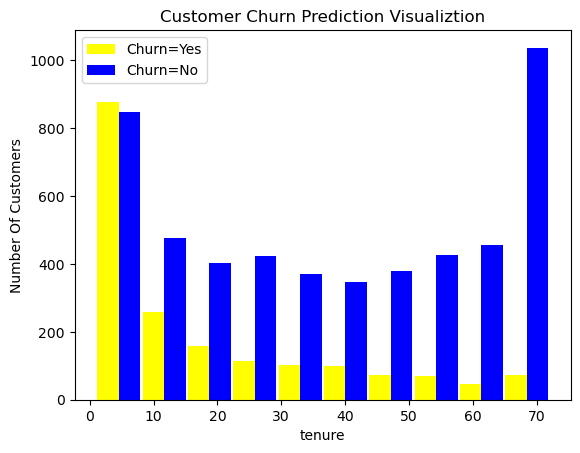

In [18]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['yellow','blue'],label=['Churn=Yes','Churn=No'])
plt.legend()

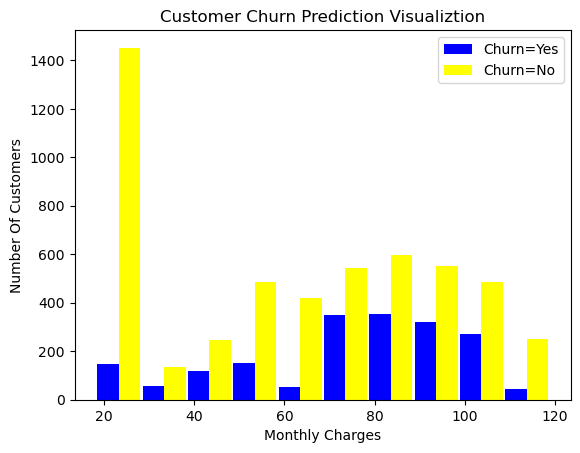

In [19]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['blue','yellow'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [20]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [21]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [22]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\SIRISHA\AppData\Local\Temp\ipykernel_28340\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\SIRISHA\AppData\Local\Temp\ipykernel_28340\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [23]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [24]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\SIRISHA\AppData\Local\Temp\ipykernel_28340\1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [25]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [26]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\SIRISHA\AppData\Local\Temp\ipykernel_28340\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [27]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [28]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2283,0,0,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1120,0,0,0,0,20,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3372,0,1,0,0,57,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
1315,1,0,1,1,11,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
72,0,1,1,1,64,1,1,1,0,1,...,0,1,0,0,0,1,1,0,0,0


In [30]:
bool_columns = ['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

df2[bool_columns] = df2[bool_columns].astype(int)

In [31]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [32]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [33]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [34]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [35]:
X_train.shape

(5625, 26)

In [36]:
X_test.shape

(1407, 26)

In [37]:
len(X_train.columns)

26

In [38]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5002 - accuracy: 0.7657
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4257 - accuracy: 0.7966
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4189 - accuracy: 0.8023
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4152 - accuracy: 0.8025
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8014
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4121 - accuracy: 0.8059
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8055
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4091 - accuracy: 0.8052
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4078 - accuracy: 0.8071
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4069 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8281
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3682 - accuracy: 0.8308
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.8302
Epoch 84/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3667 - accuracy: 0.8316
Epoch 85/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3662 - accuracy: 0.8295
Epoch 86/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3662 - accuracy: 0.8327
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3644 - accuracy: 0.8322
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3659 - accuracy: 0.8327
Epoch 89/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3661 - accuracy: 0.8302
Epoch 90/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3653 - accuracy: 

In [39]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7790


[0.46366190910339355, 0.7789623141288757]

In [40]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.23026907],
       [0.53750056],
       [0.01859249],
       [0.825808  ],
       [0.42542005]], dtype=float32)

In [41]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [42]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.64      0.55      0.59       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

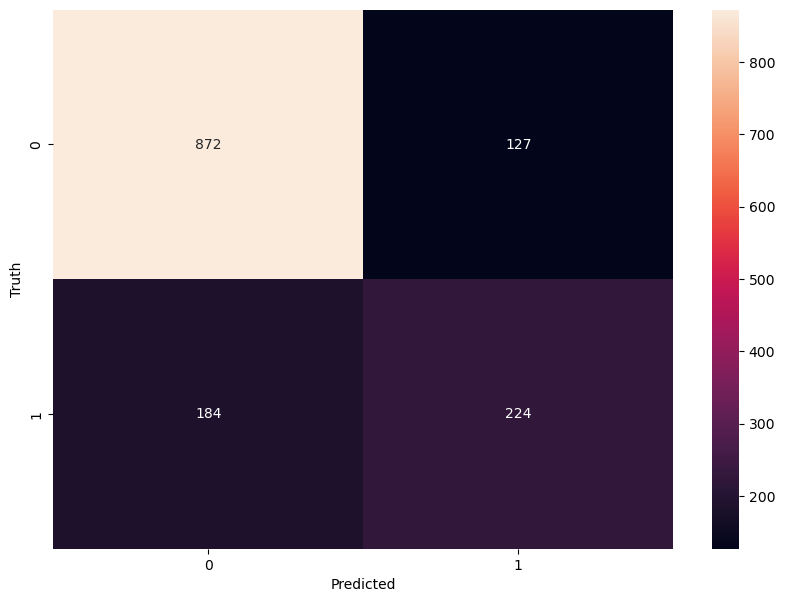

In [43]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Predicting House Prices with Neural Networks

Background:

You work for a real estate company that is looking to leverage machine learning to predict house prices based on various features. Your task is to develop a regression model using TensorFlow with the Keras API to accurately predict house prices.

Requirements:

Dataset:

1. You can download any dataset to satisfy the above problem statement.

2. A dataset is provided, containing information on various houses, such as square footage, number of bedrooms, location, etc.

3. Explore and preprocess the dataset to handle missing values, outliers, and scale numerical features appropriately.

Data Preprocessing:

1. Implement preprocessing steps to prepare the data for training, including normalization, handling categorical variables, or any other necessary transformations.

2. Split the dataset into training and testing sets.

Neural Network Architecture:

1. Design a feedforward neural network using Keras for regression.

2. Choose an appropriate architecture with input, hidden, and output layers.

3. Consider the activation functions, number of neurons in each layer, and the overall structure.

Model Training:

1. Compile the model with a suitable loss function and optimizer for regression:

2. Train the model on the training set for a specified number of epochs

3. Monitor the training process and adjust hyperparameters as needed.

Model Evaluation:

1. Evaluate the trained model on the test set using regression metrics such as Mean Squared Error (MSE) or Mean Absolute Error (MAE).

2. Visualize the predicted house prices against the actual prices to assess the model's performance.

Fine-Tuning and Optimization:

1. Experiment with hyperparameter tuning or model modifications to improve performance.

2. Discuss any challenges encountered during training and how they were addressed.

Deployment Considerations:

1. Discuss considerations for deploying the trained regression model in a real-world application.

2. Address any potential issues related to model interpretability or scalability.

Documentation and Reporting:

1. Provide clear and concise documentation for the developed model, including code comments and explanations.

2. Prepare a report summarizing the entire process, key decisions, and the model's performance.

Deliverables:

1. Python code implementing the regression model.

2. A detailed report documenting the process, including challenges faced and solutions applied.

3. Visualizations supporting the analysis of the model's performance.

This problem statement is tailored for a regression task predicting house prices, but you can modify it according to your specific regression problem and requirements. Adjust the features, target variable, and any additional considerations based on your particular use case.

In [44]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [45]:
len(X_train)

60000

In [46]:
len(X_test)

10000

In [47]:
X_train[0].shape

(28, 28)

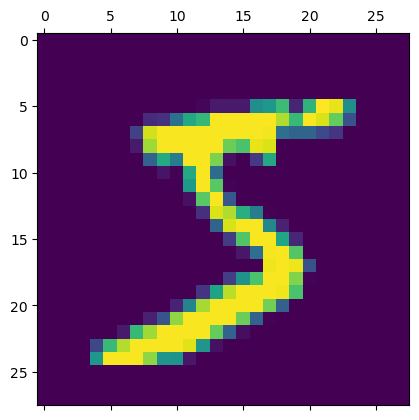

In [48]:
plt.matshow(X_train[0])

In [49]:
y_train[0]

5

In [50]:
X_train = X_train / 255
X_test = X_test / 255

In [51]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [52]:
X_train_flattened.shape

(60000, 784)

In [53]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2794 - accuracy: 0.9204
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1276 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0900 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0674 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0545 - accuracy: 0.9834


In [54]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0814 - accuracy: 0.9748


[0.0813663899898529, 0.9747999906539917]